In [ ]:
import math
import matplotlib.pyplot as plt
import keras
import pandas as pd
import numpy as np
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout
from keras.layers import *
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import train_test_split
from keras.callbacks import EarlyStopping
df=pd.read_csv("TSLA.csv")
print('Number of rows and columns:', df.shape)
df.head(5)

#区分train和test的划分，用Date和Open做预测的信息，Close用作被预测的值 
training_set = df.iloc[:800, 1:2].values
test_set = df.iloc[800:, 1:2].values

#设置特征-60为时间步长（1天）
# Feature Scaling
sc = MinMaxScaler(feature_range = (0, 1))
training_set_scaled = sc.fit_transform(training_set)
# Creating a data structure with 60 time-steps and 1 output
X_train = []
y_train = []
for i in range(60, 800):
    X_train.append(training_set_scaled[i-60:i, 0])
    y_train.append(training_set_scaled[i, 0])
X_train, y_train = np.array(X_train), np.array(y_train)
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))
#(740, 60, 1)

#建模
model = Sequential()
#Adding the first LSTM layer and some Dropout regularisation
model.add(LSTM(units = 50, return_sequences = True, input_shape = (X_train.shape[1], 1)))
model.add(Dropout(0.2))
# Adding a second LSTM layer and some Dropout regularisation
model.add(LSTM(units = 50, return_sequences = True))
model.add(Dropout(0.2))
# Adding a third LSTM layer and some Dropout regularisation
model.add(LSTM(units = 50, return_sequences = True))
model.add(Dropout(0.2))
# Adding a fourth LSTM layer and some Dropout regularisation
model.add(LSTM(units = 50))
model.add(Dropout(0.2))
# Adding the output layer
model.add(Dense(units = 1))

# Compiling the RNN
model.compile(optimizer = 'adam', loss = 'mean_squared_error')

# Fitting the RNN to the Training set
model.fit(X_train, y_train, epochs = 100, batch_size = 32)

#建立测试值
# Getting the predicted stock price of 2017
dataset_train = df.iloc[:800, 1:2]
dataset_test = df.iloc[800:, 1:2]
dataset_total = pd.concat((dataset_train, dataset_test), axis = 0)
inputs = dataset_total[len(dataset_total) - len(dataset_test) - 60:].values
inputs = inputs.reshape(-1,1)
inputs = sc.transform(inputs)
X_test = []
for i in range(60, 588):
    X_test.append(inputs[i-60:i, 0])
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
print(X_test.shape)
# (459, 60, 1)

#predict
predicted_stock_price = model.predict(X_test)
predicted_stock_price = sc.inverse_transform(predicted_stock_price)

Number of rows and columns: (1328, 7)
Epoch 1/100
24/24 [==============================] - 3s 106ms/step - loss: 0.0619
Epoch 2/100
24/24 [==============================] - 3s 113ms/step - loss: 0.0150
Epoch 3/100
24/24 [==============================] - 3s 110ms/step - loss: 0.0154
Epoch 4/100
24/24 [==============================] - 3s 112ms/step - loss: 0.0141
Epoch 5/100
24/24 [==============================] - 3s 112ms/step - loss: 0.0119
Epoch 6/100
24/24 [==============================] - 3s 113ms/step - loss: 0.0113
Epoch 7/100
24/24 [==============================] - 3s 113ms/step - loss: 0.0116
Epoch 8/100
24/24 [==============================] - 3s 112ms/step - loss: 0.0116
Epoch 9/100
24/24 [==============================] - 3s 113ms/step - loss: 0.0110
Epoch 10/100
24/24 [==============================] - 3s 112ms/step - loss: 0.0107
Epoch 11/100
24/24 [==============================] - 3s 112ms/step - loss: 0.0096
Epoch 12/100
24/24 [==============================] - 3s 1

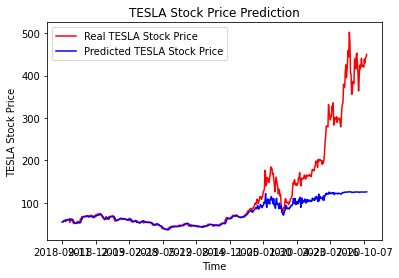

In [ ]:
#可视化
# Visualising the results
plt.plot(df.loc[800:, 'Date'],dataset_test.values, color = 'red', label = 'Real TESLA Stock Price')
plt.plot(df.loc[800:, 'Date'],predicted_stock_price, color = 'blue', label = 'Predicted TESLA Stock Price')
plt.xticks(np.arange(0,542,58))
plt.title('TESLA Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('TESLA Stock Price')
plt.legend()
plt.show()


Number of rows and columns: (1328, 7)
Epoch 1/100
4/4 [==============================] - 0s 82ms/step - loss: 0.2431
Epoch 2/100
4/4 [==============================] - 0s 83ms/step - loss: 0.0500
Epoch 3/100
4/4 [==============================] - 0s 81ms/step - loss: 0.0259
Epoch 4/100
4/4 [==============================] - 0s 82ms/step - loss: 0.0435
Epoch 5/100
4/4 [==============================] - 0s 80ms/step - loss: 0.0219
Epoch 6/100
4/4 [==============================] - 0s 79ms/step - loss: 0.0238
Epoch 7/100
4/4 [==============================] - 0s 89ms/step - loss: 0.0181
Epoch 8/100
4/4 [==============================] - 0s 84ms/step - loss: 0.0186
Epoch 9/100
4/4 [==============================] - 0s 85ms/step - loss: 0.0148
Epoch 10/100
4/4 [==============================] - 0s 81ms/step - loss: 0.0130
Epoch 11/100
4/4 [==============================] - 0s 81ms/step - loss: 0.0131
Epoch 12/100
4/4 [==============================] - 0s 83ms/step - loss: 0.0126
Epoch 13/10

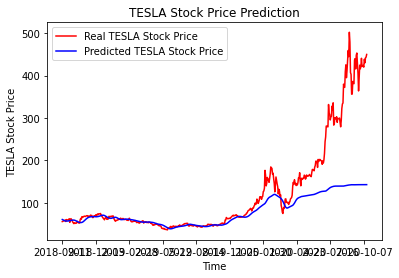

In [1]:
#lag 7
import math
import matplotlib.pyplot as plt
import keras
import pandas as pd
import numpy as np
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout
from keras.layers import *
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import train_test_split
from keras.callbacks import EarlyStopping
df=pd.read_csv("TSLA.csv")
print('Number of rows and columns:', df.shape)
df.head(5)

#区分train和test的划分，用Date和Open做预测的信息，Close用作被预测的值 
training_set = df.iloc[:800, 1:2].values
test_set = df.iloc[800:, 1:2].values

#设置特征-60为时间步长（1天）
# Feature Scaling
sc = MinMaxScaler(feature_range = (0, 1))
training_set_scaled = sc.fit_transform(training_set)
# Creating a data structure with 60 time-steps and 1 output
X_train = []
y_train = []
for i in range(60, 800,7):
    X_train.append(training_set_scaled[i-60:i, 0])
    y_train.append(training_set_scaled[i, 0])
X_train, y_train = np.array(X_train), np.array(y_train)
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))
#(740, 60, 1)

#建模
model = Sequential()
#Adding the first LSTM layer and some Dropout regularisation
model.add(LSTM(units = 50, return_sequences = True, input_shape = (X_train.shape[1], 1)))
model.add(Dropout(0.2))
# Adding a second LSTM layer and some Dropout regularisation
model.add(LSTM(units = 50, return_sequences = True))
model.add(Dropout(0.2))
# Adding a third LSTM layer and some Dropout regularisation
model.add(LSTM(units = 50, return_sequences = True))
model.add(Dropout(0.2))
# Adding a fourth LSTM layer and some Dropout regularisation
model.add(LSTM(units = 50))
model.add(Dropout(0.2))
# Adding the output layer
model.add(Dense(units = 1))

# Compiling the RNN
model.compile(optimizer = 'adam', loss = 'mean_squared_error')

# Fitting the RNN to the Training set
model.fit(X_train, y_train, epochs = 100, batch_size = 32)

#建立测试值
# Getting the predicted stock price of 2017
dataset_train = df.iloc[:800, 1:2]
dataset_test = df.iloc[800:, 1:2]
dataset_total = pd.concat((dataset_train, dataset_test), axis = 0)
inputs = dataset_total[len(dataset_total) - len(dataset_test) - 60:].values
inputs = inputs.reshape(-1,1)
inputs = sc.transform(inputs)
X_test = []
for i in range(60, 588):
    X_test.append(inputs[i-60:i, 0])
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
print(X_test.shape)
# (459, 60, 1)

#predict
predicted_stock_price = model.predict(X_test)
predicted_stock_price = sc.inverse_transform(predicted_stock_price)

#可视化
# Visualising the results
plt.plot(df.loc[800:, 'Date'],dataset_test.values, color = 'red', label = 'Real TESLA Stock Price')
plt.plot(df.loc[800:, 'Date'],predicted_stock_price, color = 'blue', label = 'Predicted TESLA Stock Price')
plt.xticks(np.arange(0,542,58))
plt.title('TESLA Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('TESLA Stock Price')
plt.legend()
plt.show()

Number of rows and columns: (1328, 7)
Epoch 1/100
2/2 [==============================] - 0s 51ms/step - loss: 0.2880
Epoch 2/100
2/2 [==============================] - 0s 54ms/step - loss: 0.1559
Epoch 3/100
2/2 [==============================] - 0s 47ms/step - loss: 0.0269
Epoch 4/100
2/2 [==============================] - 0s 51ms/step - loss: 0.0948
Epoch 5/100
2/2 [==============================] - 0s 48ms/step - loss: 0.0342
Epoch 6/100
2/2 [==============================] - 0s 52ms/step - loss: 0.0312
Epoch 7/100
2/2 [==============================] - 0s 49ms/step - loss: 0.0451
Epoch 8/100
2/2 [==============================] - 0s 50ms/step - loss: 0.0364
Epoch 9/100
2/2 [==============================] - 0s 48ms/step - loss: 0.0243
Epoch 10/100
2/2 [==============================] - 0s 48ms/step - loss: 0.0157
Epoch 11/100
2/2 [==============================] - 0s 57ms/step - loss: 0.0221
Epoch 12/100
2/2 [==============================] - 0s 48ms/step - loss: 0.0201
Epoch 13/10

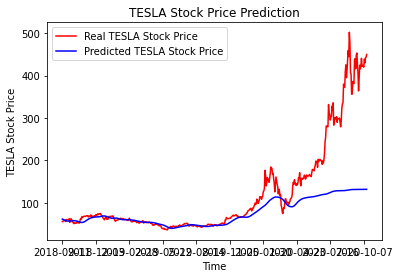

In [2]:
#lag 14
import math
import matplotlib.pyplot as plt
import keras
import pandas as pd
import numpy as np
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout
from keras.layers import *
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import train_test_split
from keras.callbacks import EarlyStopping
df=pd.read_csv("TSLA.csv")
print('Number of rows and columns:', df.shape)
df.head(5)

#区分train和test的划分，用Date和Open做预测的信息，Close用作被预测的值 
training_set = df.iloc[:800, 1:2].values
test_set = df.iloc[800:, 1:2].values

#设置特征-60为时间步长（1天）
# Feature Scaling
sc = MinMaxScaler(feature_range = (0, 1))
training_set_scaled = sc.fit_transform(training_set)
# Creating a data structure with 60 time-steps and 1 output
X_train = []
y_train = []
for i in range(60, 800,14):
    X_train.append(training_set_scaled[i-60:i, 0])
    y_train.append(training_set_scaled[i, 0])
X_train, y_train = np.array(X_train), np.array(y_train)
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))
#(740, 60, 1)

#建模
model = Sequential()
#Adding the first LSTM layer and some Dropout regularisation
model.add(LSTM(units = 50, return_sequences = True, input_shape = (X_train.shape[1], 1)))
model.add(Dropout(0.2))
# Adding a second LSTM layer and some Dropout regularisation
model.add(LSTM(units = 50, return_sequences = True))
model.add(Dropout(0.2))
# Adding a third LSTM layer and some Dropout regularisation
model.add(LSTM(units = 50, return_sequences = True))
model.add(Dropout(0.2))
# Adding a fourth LSTM layer and some Dropout regularisation
model.add(LSTM(units = 50))
model.add(Dropout(0.2))
# Adding the output layer
model.add(Dense(units = 1))

# Compiling the RNN
model.compile(optimizer = 'adam', loss = 'mean_squared_error')

# Fitting the RNN to the Training set
model.fit(X_train, y_train, epochs = 100, batch_size = 32)

#建立测试值
# Getting the predicted stock price of 2017
dataset_train = df.iloc[:800, 1:2]
dataset_test = df.iloc[800:, 1:2]
dataset_total = pd.concat((dataset_train, dataset_test), axis = 0)
inputs = dataset_total[len(dataset_total) - len(dataset_test) - 60:].values
inputs = inputs.reshape(-1,1)
inputs = sc.transform(inputs)
X_test = []
for i in range(60, 588):
    X_test.append(inputs[i-60:i, 0])
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
print(X_test.shape)
# (459, 60, 1)

#predict
predicted_stock_price = model.predict(X_test)
predicted_stock_price = sc.inverse_transform(predicted_stock_price)

#可视化
# Visualising the results
plt.plot(df.loc[800:, 'Date'],dataset_test.values, color = 'red', label = 'Real TESLA Stock Price')
plt.plot(df.loc[800:, 'Date'],predicted_stock_price, color = 'blue', label = 'Predicted TESLA Stock Price')
plt.xticks(np.arange(0,542,58))
plt.title('TESLA Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('TESLA Stock Price')
plt.legend()
plt.show()

Number of rows and columns: (1342, 7)
(740, 60, 1)
Epoch 1/100
24/24 [==============================] - 3s 126ms/step - loss: 0.0630
Epoch 2/100
24/24 [==============================] - 3s 129ms/step - loss: 0.0164
Epoch 3/100
24/24 [==============================] - 3s 133ms/step - loss: 0.0117
Epoch 4/100
24/24 [==============================] - 3s 130ms/step - loss: 0.0125
Epoch 5/100
24/24 [==============================] - 3s 130ms/step - loss: 0.0104
Epoch 6/100
24/24 [==============================] - 3s 131ms/step - loss: 0.0100
Epoch 7/100
24/24 [==============================] - 3s 130ms/step - loss: 0.0106
Epoch 8/100
24/24 [==============================] - 3s 132ms/step - loss: 0.0140
Epoch 9/100
24/24 [==============================] - 3s 133ms/step - loss: 0.0116
Epoch 10/100
24/24 [==============================] - 3s 130ms/step - loss: 0.0096
Epoch 11/100
24/24 [==============================] - 3s 132ms/step - loss: 0.0091
Epoch 12/100
24/24 [=========================

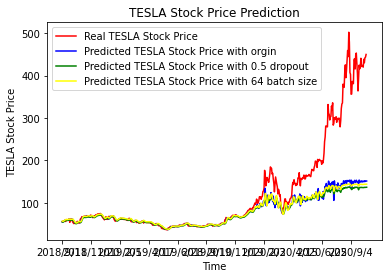

In [ ]:
import math
import matplotlib.pyplot as plt
import keras
import pandas as pd
import numpy as np
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout
from keras.layers import *
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import train_test_split
from keras.callbacks import EarlyStopping
df=pd.read_csv("TSLA.csv")
print('Number of rows and columns:', df.shape)
df.head(5)

training_set = df.iloc[:800, 1:2].values
test_set = df.iloc[800:, 1:2].values

# Feature Scaling
sc = MinMaxScaler(feature_range = (0, 1))
training_set_scaled = sc.fit_transform(training_set)
# Creating a data structure with 60 time-steps and 1 output
X_train = []
y_train = []
for i in range(60, 800):
    X_train.append(training_set_scaled[i-60:i, 0])
    y_train.append(training_set_scaled[i, 0])
X_train, y_train = np.array(X_train), np.array(y_train)
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))
#(740, 60, 1)
print(X_train.shape)
model = Sequential()
#Adding the first LSTM layer and some Dropout regularisation
model.add(LSTM(units = 100, return_sequences = True, input_shape = (X_train.shape[1], 1)))
model.add(Dropout(0.2))
# Adding a second LSTM layer and some Dropout regularisation
model.add(LSTM(units = 50, return_sequences = True))
model.add(Dropout(0.2))
# Adding a third LSTM layer and some Dropout regularisation
model.add(LSTM(units = 50, return_sequences = True))
model.add(Dropout(0.2))
# Adding a fourth LSTM layer and some Dropout regularisation
model.add(LSTM(units = 50))
model.add(Dropout(0.2))
# Adding the output layer
model.add(Dense(units = 1))

model1 = Sequential()
#Adding the first LSTM layer and some Dropout regularisation
model1.add(LSTM(units = 100, return_sequences = True, input_shape = (X_train.shape[1], 1)))
model1.add(Dropout(0.5))
# Adding a second LSTM layer and some Dropout regularisation
model1.add(LSTM(units = 50, return_sequences = True))
model1.add(Dropout(0.5))
# Adding a third LSTM layer and some Dropout regularisation
model1.add(LSTM(units = 50, return_sequences = True))
model1.add(Dropout(0.5))
# Adding a fourth LSTM layer and some Dropout regularisation
model1.add(LSTM(units = 50))
model1.add(Dropout(0.5))
# Adding the output layer
model1.add(Dense(units = 1))

model2 = Sequential()
#Adding the first LSTM layer and some Dropout regularisation
model2.add(LSTM(units = 100, return_sequences = True, input_shape = (X_train.shape[1], 1)))
model2.add(Dropout(0.2))
# Adding a second LSTM layer and some Dropout regularisation
model2.add(LSTM(units = 50, return_sequences = True))
model2.add(Dropout(0.2))
# Adding a third LSTM layer and some Dropout regularisation
model2.add(LSTM(units = 50, return_sequences = True))
model2.add(Dropout(0.2))
# Adding a fourth LSTM layer and some Dropout regularisation
model2.add(LSTM(units = 50))
model2.add(Dropout(0.2))
# Adding the output layer
model2.add(Dense(units = 1))

# Compiling the RNN
model.compile(optimizer = 'adam', loss = 'mean_squared_error')
model1.compile(optimizer = 'adam', loss = 'mean_squared_error')
model2.compile(optimizer = 'adam', loss = 'mean_squared_error')

# Fitting the RNN to the Training set
model.fit(X_train, y_train, epochs = 100, batch_size = 32)
model1.fit(X_train, y_train, epochs = 100, batch_size = 32)
model2.fit(X_train, y_train, epochs = 100, batch_size = 64)

# Getting the predicted stock price of 2017
dataset_train = df.iloc[:800, 1:2]
dataset_test = df.iloc[800:, 1:2]
dataset_total = pd.concat((dataset_train, dataset_test), axis = 0)
inputs = dataset_total[len(dataset_total) - len(dataset_test) - 60:].values
inputs = inputs.reshape(-1,1)
inputs = sc.transform(inputs)
X_test = []
y_test = []
for i in range(60, 602):
    X_test.append(inputs[i-60:i, 0])
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
print(X_test.shape)
# (459, 60, 1)

predicted_stock_price = model.predict(X_test)
predicted_stock_price = sc.inverse_transform(predicted_stock_price)

predicted_stock_price1 = model1.predict(X_test)
predicted_stock_price1 = sc.inverse_transform(predicted_stock_price1)

predicted_stock_price2 = model2.predict(X_test)
predicted_stock_price2 = sc.inverse_transform(predicted_stock_price2)

# Visualising the results
plt.plot(df.loc[800:, 'Date'],dataset_test.values, color = 'red', label = 'Real TESLA Stock Price')
a = df.loc[800:,'Date']
plt.plot(df.loc[800:, 'Date'],predicted_stock_price, color = 'blue', label = 'Predicted TESLA Stock Price with orgin')
plt.plot(df.loc[800:, 'Date'],predicted_stock_price1, color = 'green', label = 'Predicted TESLA Stock Price with 0.5 dropout')
plt.plot(df.loc[800:, 'Date'],predicted_stock_price2, color = 'yellow', label = 'Predicted TESLA Stock Price with 64 batch size')
plt.xticks(np.arange(0,528,50))
plt.title('TESLA Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('TESLA Stock Price')
plt.legend()
plt.show()

Number of rows and columns: (1328, 7)
Epoch 1/100
24/24 [==============================] - 3s 111ms/step - loss: 0.0727
Epoch 2/100
24/24 [==============================] - 3s 115ms/step - loss: 0.0165
Epoch 3/100
24/24 [==============================] - 3s 118ms/step - loss: 0.0125
Epoch 4/100
24/24 [==============================] - 3s 121ms/step - loss: 0.0120
Epoch 5/100
24/24 [==============================] - 3s 118ms/step - loss: 0.0108
Epoch 6/100
24/24 [==============================] - 3s 115ms/step - loss: 0.0115
Epoch 7/100
24/24 [==============================] - 3s 115ms/step - loss: 0.0119
Epoch 8/100
24/24 [==============================] - 3s 117ms/step - loss: 0.0105
Epoch 9/100
24/24 [==============================] - 3s 121ms/step - loss: 0.0113
Epoch 10/100
24/24 [==============================] - 3s 118ms/step - loss: 0.0117
Epoch 11/100
24/24 [==============================] - 3s 114ms/step - loss: 0.0107
Epoch 12/100
24/24 [==============================] - 3s 1

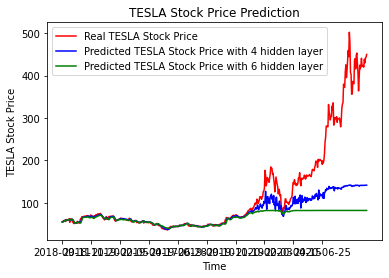

In [ ]:
import math
import matplotlib.pyplot as plt
import keras
import pandas as pd
import numpy as np
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout
from keras.layers import *
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import train_test_split
from keras.callbacks import EarlyStopping
df=pd.read_csv("TSLA.csv")
print('Number of rows and columns:', df.shape)
df.head(5)

#区分train和test的划分，用Date和Open做预测的信息，Close用作被预测的值 
training_set = df.iloc[:800, 1:2].values
test_set = df.iloc[800:, 1:2].values

#设置特征-60为时间步长（1天）
# Feature Scaling
sc = MinMaxScaler(feature_range = (0, 1))
training_set_scaled = sc.fit_transform(training_set)
# Creating a data structure with 60 time-steps and 1 output
X_train = []
y_train = []
for i in range(60, 800):
    X_train.append(training_set_scaled[i-60:i, 0])
    y_train.append(training_set_scaled[i, 0])
X_train, y_train = np.array(X_train), np.array(y_train)
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))
#(740, 60, 1)

#建模
model = Sequential()
#Adding the first LSTM layer and some Dropout regularisation
model.add(LSTM(units = 50, return_sequences = True, input_shape = (X_train.shape[1], 1)))
model.add(Dropout(0.2))
# Adding a second LSTM layer and some Dropout regularisation
model.add(LSTM(units = 50, return_sequences = True))
model.add(Dropout(0.2))
# Adding a third LSTM layer and some Dropout regularisation
model.add(LSTM(units = 50, return_sequences = True))
model.add(Dropout(0.2))
# Adding a fourth LSTM layer and some Dropout regularisation
model.add(LSTM(units = 50))
model.add(Dropout(0.2))
# Adding the output layer
model.add(Dense(units = 1))

#建模
model1 = Sequential()
#Adding the first LSTM layer and some Dropout regularisation
model1.add(LSTM(units = 50, return_sequences = True, input_shape = (X_train.shape[1], 1)))
model1.add(Dropout(0.2))
# Adding a second LSTM layer and some Dropout regularisation
model1.add(LSTM(units = 50, return_sequences = True))
model1.add(Dropout(0.2))
# Adding a second LSTM layer and some Dropout regularisation
model1.add(LSTM(units = 50, return_sequences = True))
model1.add(Dropout(0.2))
# Adding a third LSTM layer and some Dropout regularisation
model1.add(LSTM(units = 50, return_sequences = True))
model1.add(Dropout(0.2))
# Adding a fourth LSTM layer and some Dropout regularisation
model1.add(LSTM(units = 50, return_sequences = True))
model1.add(Dropout(0.2))
# Adding a fourth LSTM layer and some Dropout regularisation
model1.add(LSTM(units = 50))
model1.add(Dropout(0.2))
# Adding the output layer
model1.add(Dense(units = 1))

# Compiling the RNN
model.compile(optimizer = 'adam', loss = 'mean_squared_error')
model1.compile(optimizer = 'adam', loss = 'mean_squared_error')

# Fitting the RNN to the Training set
model.fit(X_train, y_train, epochs = 100, batch_size = 32)
model1.fit(X_train, y_train, epochs = 100, batch_size = 32)
#建立测试值
# Getting the predicted stock price of 2017
dataset_train = df.iloc[:800, 1:2]
dataset_test = df.iloc[800:, 1:2]
dataset_total = pd.concat((dataset_train, dataset_test), axis = 0)
inputs = dataset_total[len(dataset_total) - len(dataset_test) - 60:].values
inputs = inputs.reshape(-1,1)
inputs = sc.transform(inputs)
X_test = []
for i in range(60, 588):
    X_test.append(inputs[i-60:i, 0])
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
print(X_test.shape)
# (459, 60, 1)

#预测
predicted_stock_price = model.predict(X_test)
predicted_stock_price = sc.inverse_transform(predicted_stock_price)
predicted_stock_price1 = model1.predict(X_test)
predicted_stock_price1 = sc.inverse_transform(predicted_stock_price1)
#可视化
# Visualising the results
plt.plot(df.loc[800:, 'Date'],dataset_test.values, color = 'red', label = 'Real TESLA Stock Price')
plt.plot(df.loc[800:, 'Date'],predicted_stock_price, color = 'blue', label = 'Predicted TESLA Stock Price with 4 hidden layer')
plt.plot(df.loc[800:, 'Date'],predicted_stock_price1, color = 'green', label = 'Predicted TESLA Stock Price with 6 hidden layer')
plt.xticks(np.arange(0,459,50))
plt.title('TESLA Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('TESLA Stock Price')
plt.legend()
plt.show()


In [ ]:
import math
import matplotlib.pyplot as plt
import keras
import pandas as pd
import numpy as np
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout
from keras.layers import *
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import train_test_split
from keras.callbacks import EarlyStopping
df=pd.read_csv("TSLA.csv")
print('Number of rows and columns:', df.shape)
df.head(5)

#区分train和test的划分，用Date和Open做预测的信息，Close用作被预测的值 
training_set = df.iloc[:800, 1:2].values
test_set = df.iloc[800:, 1:2].values

#设置特征-60为时间步长（1天）
# Feature Scaling
sc = MinMaxScaler(feature_range = (0, 1))
training_set_scaled = sc.fit_transform(training_set)
# Creating a data structure with 60 time-steps and 1 output
X_train = []
y_train = []
for i in range(60, 800,7):
    X_train.append(training_set_scaled[i-60:i, 0])
    y_train.append(training_set_scaled[i, 0])
X_train, y_train = np.array(X_train), np.array(y_train)
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))
#(740, 60, 1)

#建模
model = Sequential()
#Adding the first LSTM layer and some Dropout regularisation
model.add(LSTM(units = 50, return_sequences = True, input_shape = (X_train.shape[1], 1)))
model.add(Dropout(0.2))
# Adding a second LSTM layer and some Dropout regularisation
model.add(LSTM(units = 50, return_sequences = True))
model.add(Dropout(0.2))
# Adding a third LSTM layer and some Dropout regularisation
model.add(LSTM(units = 50, return_sequences = True))
model.add(Dropout(0.2))
# Adding a fourth LSTM layer and some Dropout regularisation
model.add(LSTM(units = 50))
model.add(Dropout(0.2))
# Adding the output layer
model.add(Dense(units = 1))

# Compiling the RNN
model.compile(optimizer = 'adam', loss = 'mean_squared_error')

# Fitting the RNN to the Training set
model.fit(X_train, y_train, epochs = 100, batch_size = 32)

#建立测试值
# Getting the predicted stock price of 2017
dataset_train = df.iloc[:800, 1:2]
dataset_test = df.iloc[800:, 1:2]
dataset_total = pd.concat((dataset_train, dataset_test), axis = 0)
inputs = dataset_total[len(dataset_total) - len(dataset_test) - 60:].values
inputs = inputs.reshape(-1,1)
inputs = sc.transform(inputs)
X_test = []
for i in range(60, 588):
    X_test.append(inputs[i-60:i, 0])
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
print(X_test.shape)
# (459, 60, 1)

#predict
predicted_stock_price = model.predict(X_test)
predicted_stock_price = sc.inverse_transform(predicted_stock_price)

Number of rows and columns: (1328, 7)
Epoch 1/100
4/4 [==============================] - 0s 78ms/step - loss: 0.1837
Epoch 2/100
4/4 [==============================] - 0s 81ms/step - loss: 0.0484
Epoch 3/100
4/4 [==============================] - 0s 81ms/step - loss: 0.0282
Epoch 4/100
4/4 [==============================] - 0s 80ms/step - loss: 0.0233
Epoch 5/100
4/4 [==============================] - 0s 83ms/step - loss: 0.0245
Epoch 6/100
4/4 [==============================] - 0s 81ms/step - loss: 0.0176
Epoch 7/100
4/4 [==============================] - 0s 82ms/step - loss: 0.0155
Epoch 8/100
4/4 [==============================] - 0s 82ms/step - loss: 0.0145
Epoch 9/100
4/4 [==============================] - 0s 81ms/step - loss: 0.0130
Epoch 10/100
4/4 [==============================] - 0s 82ms/step - loss: 0.0119
Epoch 11/100
4/4 [==============================] - 0s 80ms/step - loss: 0.0112
Epoch 12/100
4/4 [==============================] - 0s 82ms/step - loss: 0.0120
Epoch 13/10

In [ ]:
import copy
X_test2 = copy.deepcopy(X_test)
for i in range(14):
    X_temp = np.zeros([1,60,1])
    for j in range(58):
        X_temp[0][j][0]= X_test[-1][j+1][0]
    X_temp[0][59][0] = model.predict(X_test2[-1:])[0][0]
    X_test2 = np.vstack([X_test2,X_temp])

predicted_stock_price = model.predict(X_test2)
predicted_stock_price = sc.inverse_transform(predicted_stock_price)
predicted_stock_price.shape

(542, 1)

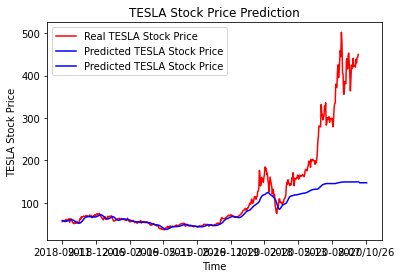

In [ ]:
# Visualising the results
c = ["2020/10/14","2020/10/15","2020/10/16","2020/10/17","2020/10/18","2020/10/19","2020/10/20","2020/10/21","2020/10/22","2020/10/23","2020/10/24","2020/10/25","2020/10/26","2020/10/27","2020/10/28"]
plt.plot(df.loc[800:, 'Date'],dataset_test.values, color = 'red', label = 'Real TESLA Stock Price')
plt.plot(df.loc[800:1325, 'Date'],predicted_stock_price[1:527], color = 'blue', label = 'Predicted TESLA Stock Price')
plt.plot(c,predicted_stock_price[527:], color = 'blue', label = 'Predicted TESLA Stock Price')
plt.title('TESLA Stock Price Prediction')
plt.xticks(np.arange(0,542,60))
plt.xlabel('Time')
plt.ylabel('TESLA Stock Price')
plt.legend()
plt.show()

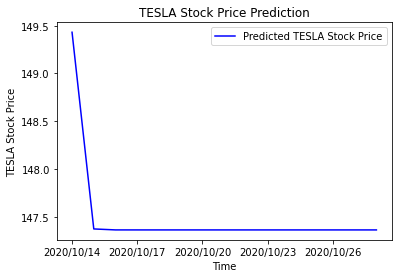

In [ ]:
plt.plot(c,predicted_stock_price[527:], color = 'blue', label = 'Predicted TESLA Stock Price')
plt.title('TESLA Stock Price Prediction')
plt.xticks(np.arange(0,14,3))
plt.xlabel('Time')
plt.ylabel('TESLA Stock Price')
plt.legend()
plt.show()